## Making TF records from Solar Data Tutorial

In [1]:
# import necessary packages

#from __future__ import absolute_import, division, print_function
#import argparse
#import multiprocessing
import os
import sys
import numpy as np
#import pdb
from random import shuffle
import pandas as pd
import tensorflow as tf
from astropy.io import fits
from astropy.io.fits import getheader
import tensorflow as tf
from tf_util import example_util
import matplotlib.pylab as plt

In [2]:
# read in the HARPS data that has been shifted and is ready for being added to TF records

# set outfile to filename
# outfile = 'HARPS2.3.1_ready_for_TF_records.npz'
outfile = 'New_HARPS_ready_for_TF_records.npz'
org_file = 'HARPS2.3.1_ready_for_TF_records.npz'
# load the file
npzfile = np.load(outfile) 
onpzfile = np.load(org_file)

# List the column names in this file
onpzfile.files

######### Need review: ########
# vrad_star
# og_ccf_list
# jup_shifted_CCF_data_list
# zero_shifted_CCF_list ???????
# mu_og_list (possibly ok)
# mu_jup_list
# mu_zero_list
# cont
# bis

['BJD',
 'vrad_star',
 'og_ccf_list',
 'jup_shifted_CCF_data_list',
 'zero_shifted_CCF_list',
 'CCF_normalized_list',
 'cff_residual_list',
 'ccf_residual_rescaled',
 'CCF_normalized_list_cutoff',
 'CCF_residual_list_cutoff',
 'ccf_residual_rescaled_cutoff',
 'mu_og_list',
 'mu_jup_list',
 'mu_zero_list',
 'fwhm',
 'cont',
 'bis',
 'shift_by_rv']

In [3]:
#for key in npzfile.files:
    # Access the array using the key and get its shape
#    print(f"Shape of {key}: {npzfile[key].shape}")

In [4]:
onpzfile['shift_by_rv'].item()

'prov_rvs'

In [ ]:
y_data = npzfile['cff_residual_list'][1]
y2_data = onpzfile['cff_residual_list'][1]
y3_data = y2_data - y_data
# print(f"New data: {y_data} vs. Old data: {y2_data}")



New data: [ 2.07615015e-04 -4.92287431e-05 -6.29399431e-05 -3.60993522e-05
  1.45143158e-05  7.49444771e-05  8.67121929e-05 -5.12424231e-05
 -4.91049987e-05  6.98966250e-05  5.49523226e-05  4.79095404e-05
  7.10916947e-05  1.84687301e-04  2.30812039e-04  2.77318977e-04
  3.63751458e-04  6.92292996e-04  1.09257032e-03  1.38516318e-03
  1.63203468e-03  1.74449470e-03  1.67143155e-03  1.48281256e-03
  1.13453849e-03  6.31647144e-04  1.52739338e-04 -3.09523773e-04
 -6.28073168e-04 -7.01483753e-04 -6.11158680e-04 -5.75594389e-04
 -4.36902630e-04 -3.13546069e-04 -1.97402144e-04 -1.67090170e-04
 -1.26641038e-04 -4.00208755e-05 -1.35104368e-06 -5.79883964e-05
 -9.35083751e-05 -1.68734602e-04 -1.87206014e-04 -6.91019255e-05
 -4.64327323e-05 -6.03757895e-05 -3.16122382e-05 -1.46406833e-04
 -1.19794390e-05] vs. Old data: [ 1.10580340e-04  7.22357032e-05  6.84229557e-05  5.67548294e-05
  9.73363239e-05  2.06135192e-04  1.48328211e-04  2.43705258e-05
  5.73162408e-05  1.76984339e-04  1.58767845e-04

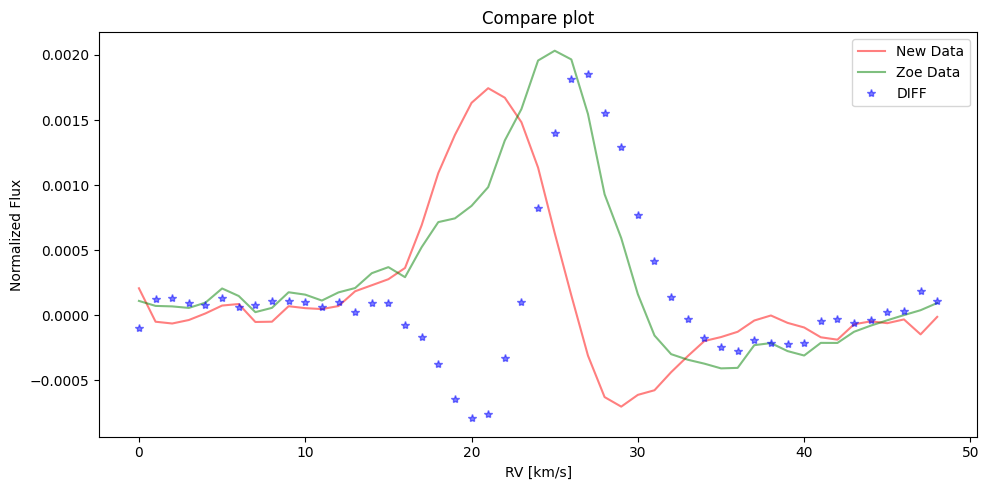

In [ ]:
from datetime import datetime, timedelta
def BJD2dates(date_values, match_date=None):
    """
    Accepts an array of float dates (JD or MJD), sorts them, 
    and prints the readable ISO format with an index.
    
    Parameters:
    - date_values: list or array of float dates
    - match_date: string (optional), e.g., '2016-03-09' to filter the output
    """
    # Ensure input is a numpy array and sort it
    dates_arr = np.sort(np.array(date_values, dtype=np.float64))
    
    # MJD Epoch (November 17, 1858)
    epoch = datetime(1858, 11, 17)
    
    # Header for the output
    print(f"{'Idx':<5} | {'Original Value':<20} | {'Type':<5} | {'Readable Date (UTC/ISO)'}")
    print("-" * 75)
    
    for i, val in enumerate(dates_arr):
        # Determine if the value is JD or MJD
        if val > 2400000:
            # Convert JD to MJD
            mjd_value = val - 2400000.5
            date_type = "JD"
        else:
            # Already MJD
            mjd_value = val
            date_type = "MJD"

        # Convert to datetime object
        # timedelta handles the fractional days (time) automatically
        readable_date = epoch + timedelta(days=float(mjd_value))
        
        iso_date = readable_date.isoformat()
        
        # If match_date is provided, only print if it matches
        if match_date is not None:
            if not iso_date.startswith(match_date):
                continue
        
        # Print formatted row with index
        print(f"{i:<5} | {val:<18.10f} | {date_type:<5} | {iso_date}")

In [7]:
from datetime import datetime, timedelta
def BJD2dates(date_values):
    """
    Accepts an array of float dates (JD or MJD), sorts them, 
    and prints the readable ISO format.
    """
    # Ensure input is a numpy array and sort it
    dates_arr = np.sort(np.array(date_values, dtype=np.float64))
    
    # MJD Epoch (November 17, 1858)
    epoch = datetime(1858, 11, 17)
    
    # Header for the output
    print(f"{'Original Value':<20} | {'Type':<5} | {'Readable Date (UTC/ISO)'}")
    print("-" * 60)
    
    for val in dates_arr:
        # Determine if the value is JD or MJD
        if val > 2400000:
            # Convert JD to MJD
            mjd_value = val - 2400000.5
            date_type = "JD"
        else:
            # Already MJD
            mjd_value = val
            date_type = "MJD"

        # Convert to datetime object
        # timedelta handles the fractional days (time) automatically
        readable_date = epoch + timedelta(days=float(mjd_value))
        
        # Print formatted row
        print(f"{val:<18.10f} | {date_type:<5} | {readable_date.isoformat()}")

In [8]:
# BJD2dates(npzfile['BJD'])

In [9]:
BJD2dates(onpzfile['BJD'])

Original Value       | Type  | Readable Date (UTC/ISO)
------------------------------------------------------------
2457222.9958755248 | JD    | 2015-07-19T11:54:03.645345
2457232.9921516497 | JD    | 2015-07-29T11:48:41.902531
2457233.9968668828 | JD    | 2015-07-30T11:55:29.298672
2457235.0000077188 | JD    | 2015-07-31T12:00:00.666904
2457236.0006646244 | JD    | 2015-08-01T12:00:57.423547
2457237.0004253644 | JD    | 2015-08-02T12:00:36.751480
2457237.9962247657 | JD    | 2015-08-03T11:54:33.819754
2457239.0323848473 | JD    | 2015-08-04T12:46:38.050806
2457239.9771594899 | JD    | 2015-08-05T11:27:06.579925
2457242.0329332636 | JD    | 2015-08-07T12:47:25.433973
2457252.0045627230 | JD    | 2015-08-17T12:06:34.219266
2457253.9910402228 | JD    | 2015-08-19T11:47:05.875251
2457256.0129388543 | JD    | 2015-08-21T12:18:37.917010
2457257.0298815221 | JD    | 2015-08-22T12:43:01.763506
2457260.0166708864 | JD    | 2015-08-25T12:24:00.364587
2457261.0131460428 | JD    | 2015-08-26T12:1

## Try adding a new feature now :)